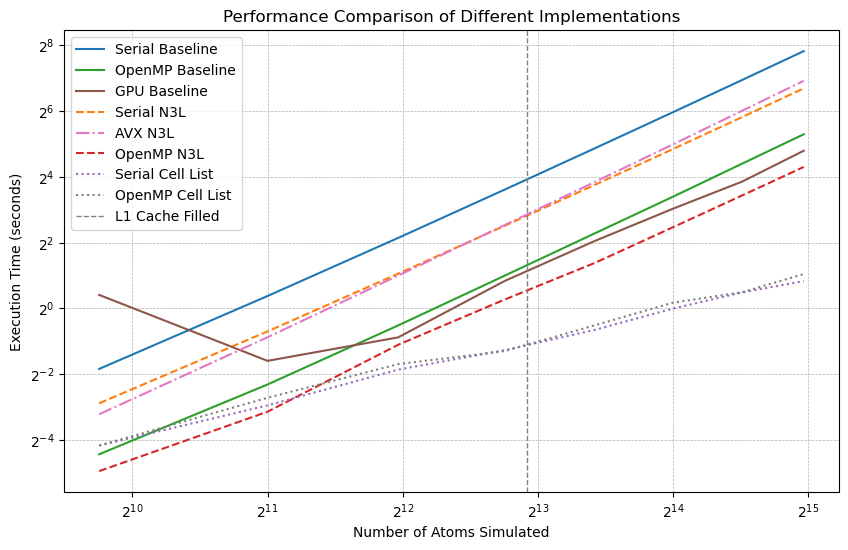

In [4]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('data.csv')

# 1) define per-series linestyles (no leading spaces on keys!)
linestyle_map = {
    "Baseline":        "-",
    "OpenMP Baseline": "-",
    "GPU Baseline":    "-",
    "N3L":             "--",
    "AVX N3L":            "-.",      
    "OpenMP N3L":      "--",
    "Cell List":       ":",
    "OpenMP Cell List":   ":",       

}

plt.figure(figsize=(10, 6))
for column in data.columns[1:]:
    col = column.strip()                         # strip any stray whitespace
    style = linestyle_map.get(col, "-")          # look up the linestyle
    plt.plot(
        data["# Atoms"],
        data[column],
        label=col,                               # use the stripped name as label
        linestyle=style
    )

# axis labels, title
plt.xlabel('Number of Atoms Simulated')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison of Different Implementations')
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xscale('log', base=2)
plt.yscale('log', base=2)

# 2) draw your vertical line (it’ll pick up its own linestyle too)
plt.axvline(x=7736, color='gray', linestyle='--', linewidth=1, label='L1 Cache Filled')

# 3) rebuild the legend one final time
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

# renames for the legend
label_map = {
    "Baseline":    "Serial Baseline",
    "N3L":         "Serial N3L",
    "Cell List":   "Serial Cell List"
}
labels = [ label_map.get(lbl, lbl) for lbl in labels ]

# final draw order
order = [
    "Serial Baseline", "OpenMP Baseline", "GPU Baseline",
    "Serial N3L", "AVX N3L" ,     "OpenMP N3L",     "Serial Cell List", "OpenMP Cell List",
    "L1 Cache Filled"
]
ordered = sorted(zip(handles, labels), key=lambda x: order.index(x[1]))
handles, labels = zip(*ordered)

plt.legend(handles, labels, loc='best')
plt.savefig('performance_comparison.png')